#SMA Percent Band

    1. The SPY is closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.

In [15]:
%matplotlib inline

Use future imports for python 3.0 forward compatibility

In [16]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

Other imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# Double the DPI, so we are making 2x plots:
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

Some global data

In [18]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 100000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(1970 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [19]:
sma_period = 200
percent_band = 3.5

Run Strategy

In [20]:
s = strategy.Strategy(symbol, capital, start, end, sma_period, percent_band)
s.run()

Retrieve log DataFrames

In [21]:
s.tlog, s.dbal = s.get_logs()
s.stats = s.stats()

In [22]:
s.tlog.tail(100)

,entry_date,entry_price,long_short,qty,exit_date,exit_price,pl_points,pl_cash,cumul_total
0,1994-01-10,47.59,long,2101.00,1994-03-30 00:00:00,44.47,-3.12,-6565.62,-6565.62
1,1994-08-30,47.78,long,1955.00,1998-08-31 00:00:00,96.00,48.22,94267.75,87702.13
2,1998-11-02,111.88,long,1677.00,1999-10-15 00:00:00,124.88,13.00,21801.00,109503.13
3,1999-10-29,137.00,long,1529.00,2000-10-10 00:00:00,137.69,0.69,1051.19,110554.32
4,2003-04-23,92.18,long,2284.00,2004-08-06 00:00:00,106.85,14.67,33506.28,144060.59
5,2004-11-04,116.55,long,2094.00,2007-11-21 00:00:00,141.68,25.13,52622.20,196682.79
6,2009-06-11,94.82,long,3128.00,2010-06-04 00:00:00,106.82,12.00,37536.00,234218.79
7,2010-10-05,116.04,long,2880.00,2011-08-04 00:00:00,120.26,4.22,12153.60,246372.39
8,2012-01-18,130.77,long,2648.00,2015-08-21 00:00:00,197.83,67.06,177574.87,423947.27
9,2016-04-18,209.24,long,2504.00,2016-07-08 00:00:00,212.65,3.41,8538.61,432485.88


In [23]:
s.dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2016-07-01,527077.27,524072.44,525649.97,2504.00,10.30,1
2016-07-05,523546.62,520116.15,521868.95,2504.00,10.30,1
2016-07-06,525349.50,518488.53,524998.95,2504.00,10.30,1
2016-07-07,527477.88,522419.83,524673.41,2504.00,10.30,1
2016-07-08,533212.06,527803.41,532485.88,2504.00,10.30,2


Generate strategy stats - display all available stats

In [24]:
pf.print_full(s.stats)

start                                                   1993-11-11
end                                                     2016-07-08
beginning_balance                                           100000
ending_balance                                           532485.88
total_net_profit                                         432485.88
gross_profit                                             439051.51
gross_loss                                                -6565.62
profit_factor                                                66.87
return_on_initial_capital                                   432.49
annual_return_rate                                            7.66
trading_period                           22 years 7 months 27 days
pct_time_in_market                                           71.27
total_num_trades                                                10
num_winning_trades                                               9
num_losing_trades                                             

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [25]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1993-11-11 00:00:00 BUY  3287 SPY @ 30.42
2016-07-08 00:00:00 SELL 3287.0 SPY @ 212.65


Plot Equity Curves: Strategy vs Benchmark

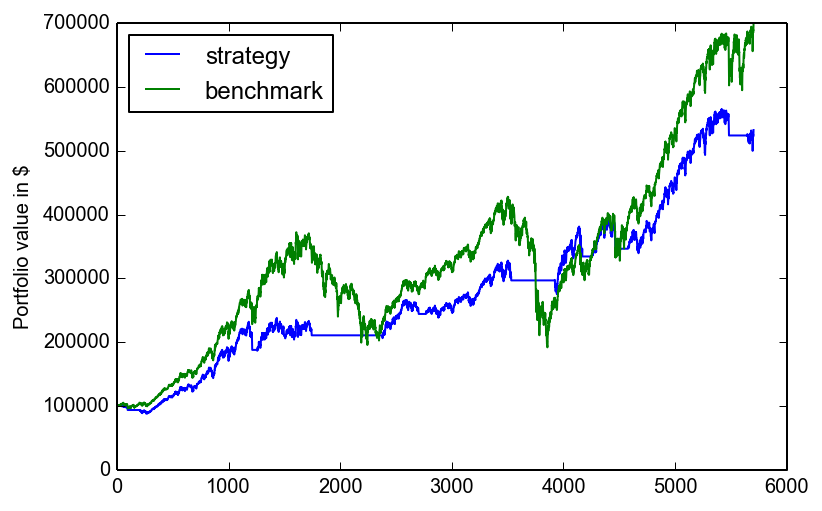

In [26]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

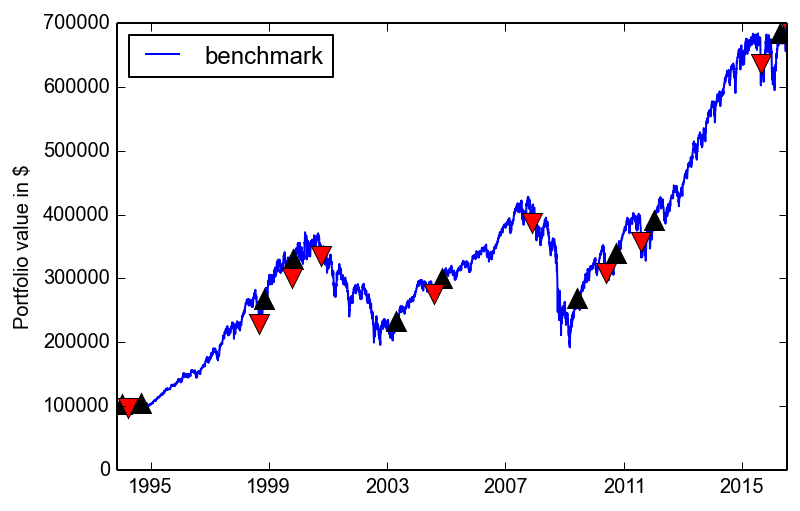

In [27]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,7.66,8.96
max_closed_out_drawdown,-19.62,-55.19
drawdown_annualized_return,-2.56,-6.16
drawdown_recovery,-0.30,-1.42
best_month,15.17,23.62
worst_month,-13.75,-29.41
sharpe_ratio,0.66,0.55
sortino_ratio,0.74,0.72
monthly_std,3.04,4.48


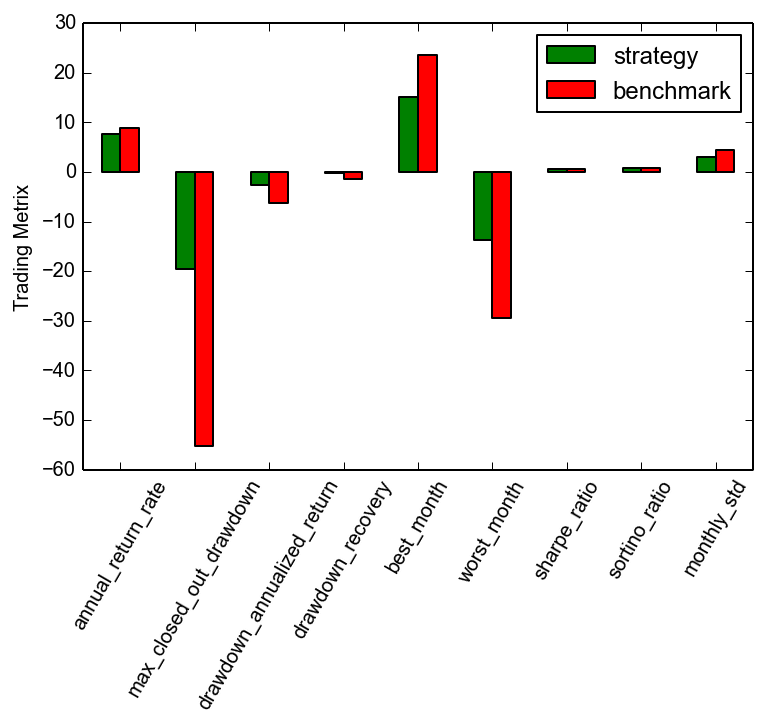

In [28]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(s.stats, benchmark.stats, *metrics)
df